In [1]:
import kagglehub
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

classification_folder = os.path.join(path, 'Knee Osteoarthritis Classification')
train_path = os.path.join(classification_folder, 'train')
val_path = os.path.join(classification_folder, 'val')
test_path = os.path.join(classification_folder, 'test')

print(f"Train path: {train_path}")
print(f"Validation path: {val_path}")
print(f"Test path: {test_path}")





Train path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train
Validation path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val
Test path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test


In [2]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3780 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.
Found 540 images belonging to 3 classes.


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 68s 415ms/step - accuracy: 0.3474 - loss: 1.3883 - val_accuracy: 0.4833 - val_loss: 1.0261 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.4498 - loss: 1.0325 - val_accuracy: 0.5398 - val_loss: 0.9759 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.4809 - loss: 0.9943 - val_accuracy: 0.5444 - val_loss: 0.9386 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.5186 - loss: 0.9523 - val_accuracy: 0.5694 - val_loss: 0.9089 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.5324 - loss: 0.9264 - val_accuracy: 0.5769 - val_loss: 0.8877 - learning_rate: 1.0000e-04
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.5528 - loss: 0.9031 - val_accuracy: 0.5926 - val_loss: 0.8738 - learning_rate: 1.0000e-04
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 12

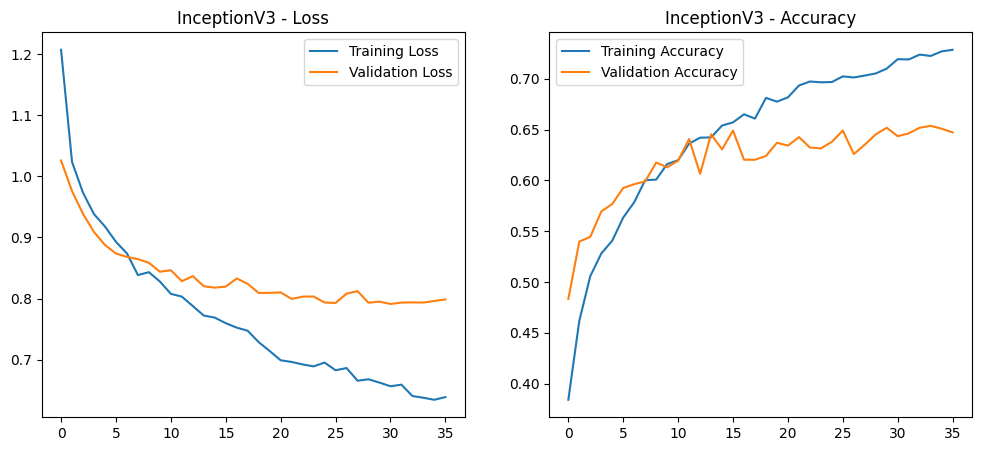

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 628ms/step - accuracy: 0.6317 - loss: 0.7308
Test Accuracy: 0.73, Test Loss: 0.64
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 412ms/step
              precision    recall  f1-score   support

      Normal       0.81      0.62      0.70       180
  Osteopenia       0.75      0.87      0.81       180
Osteoporosis       0.65      0.71      0.68       180

    accuracy                           0.73       540
   macro avg       0.74      0.73      0.73       540
weighted avg       0.74      0.73      0.73       540



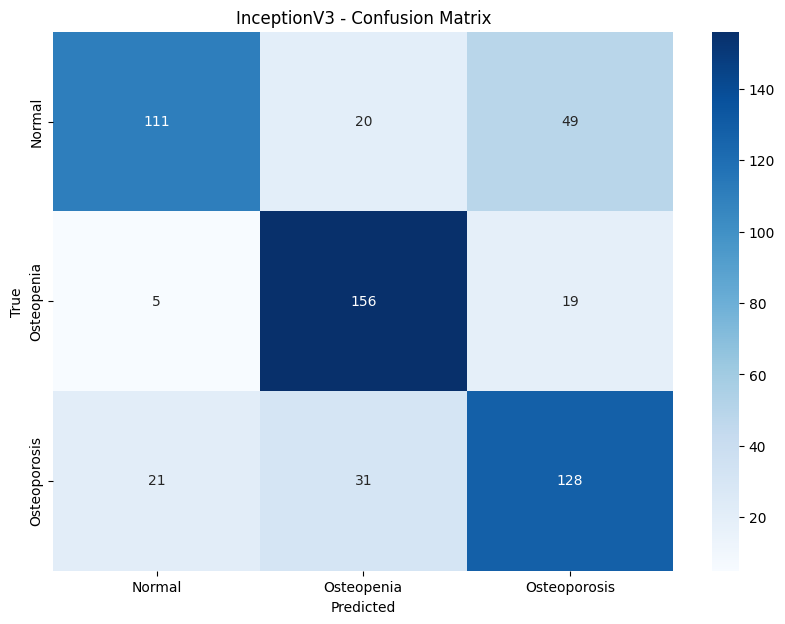

In [3]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

model.save("/content/InceptionV3_KneeOsteo_DeepModel.keras")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('InceptionV3 - Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('InceptionV3 - Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('InceptionV3 - Confusion Matrix')
plt.show()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 39s 214ms/step - accuracy: 0.3588 - loss: 1.4505 - val_accuracy: 0.3370 - val_loss: 1.0980 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.3227 - loss: 1.1525 - val_accuracy: 0.3704 - val_loss: 1.0952 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.3469 - loss: 1.1054 - val_accuracy: 0.4361 - val_loss: 1.0893 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.3631 - loss: 1.0947 - val_accuracy: 0.4046 - val_loss: 1.0839 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.3828 - loss: 1.0901 - val_accuracy: 0.4648 - val_loss: 1.0828 - learning_rate: 1.0000e-04
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.3741 - loss: 1.0901 - val_accuracy: 0.4731 - val_loss: 1.0843 - learning_rate: 

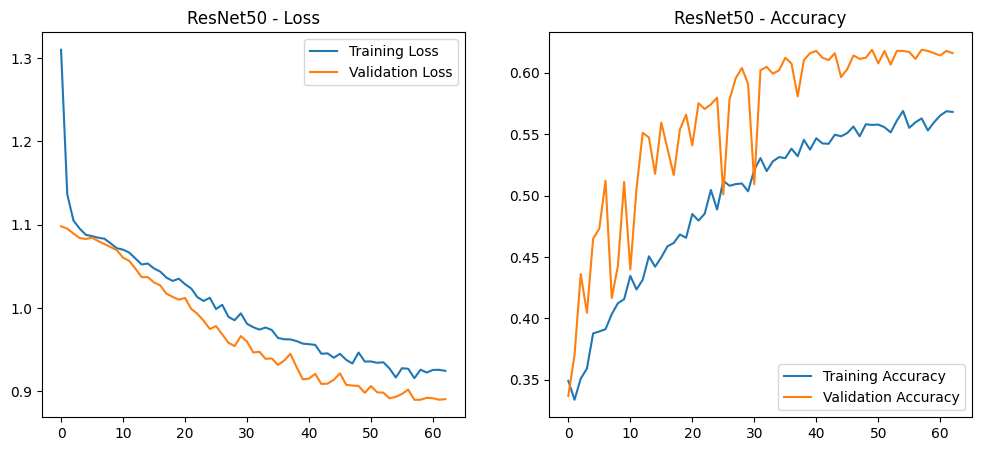

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.4589 - loss: 0.8719
Test Accuracy: 0.62, Test Loss: 0.83
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step
              precision    recall  f1-score   support

      Normal       0.67      0.37      0.47       180
  Osteopenia       0.73      0.78      0.75       180
Osteoporosis       0.51      0.72      0.60       180

    accuracy                           0.62       540
   macro avg       0.64      0.62      0.61       540
weighted avg       0.64      0.62      0.61       540



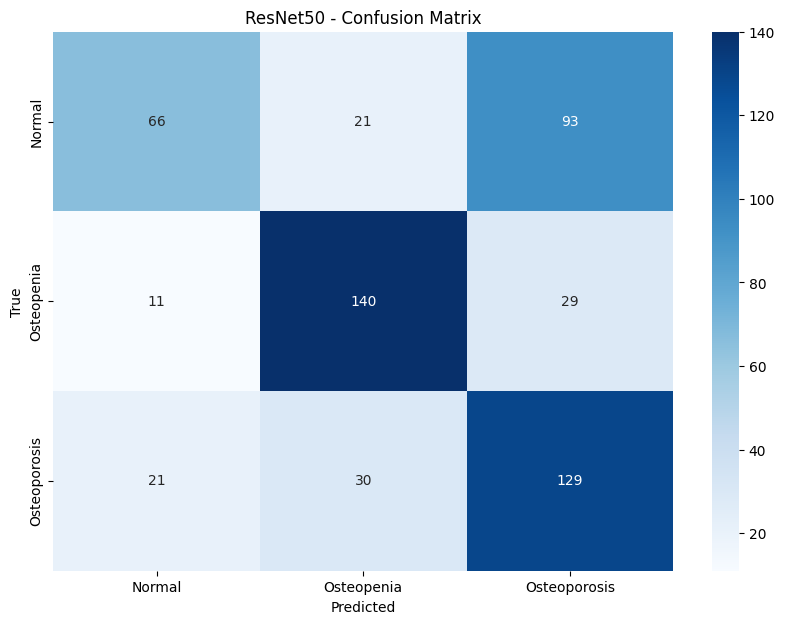

In [4]:
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# -------------------- ResNet50 Model --------------------
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

model.save("/content/ResNet50_KneeOsteo_DeepModel.keras")

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('ResNet50 - Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('ResNet50 - Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ResNet50 - Confusion Matrix')
plt.show()


Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.3184 - loss: 1.1469 - val_accuracy: 0.3333 - val_loss: 1.0999 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.3366 - loss: 1.1061 - val_accuracy: 0.3333 - val_loss: 1.0991 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.3328 - loss: 1.1026 - val_accuracy: 0.3333 - val_loss: 1.0988 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.3369 - loss: 1.1006 - val_accuracy: 0.3333 - val_loss: 1.0987 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.3331 - loss: 1.0992 - val_accuracy: 0.3333 - val_loss: 1.0986 - learning_rate: 1.0000e-04
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.3468 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0986 - learning_rate: 1.0000e-04
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s

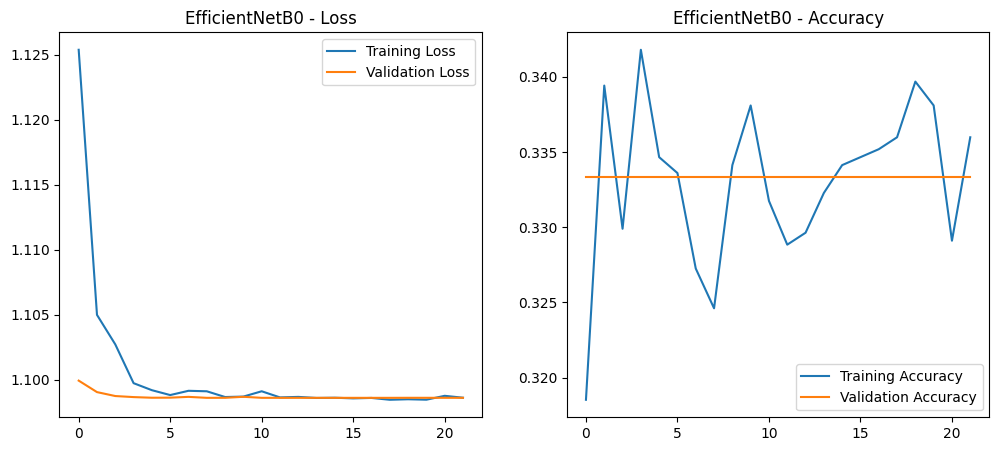

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step - accuracy: 0.6578 - loss: 1.0975
EfficientNetB0 - Test Accuracy: 0.33, Test Loss: 1.10
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step
              precision    recall  f1-score   support

      Normal       0.33      1.00      0.50       180
  Osteopenia       0.00      0.00      0.00       180
Osteoporosis       0.00      0.00      0.00       180

    accuracy                           0.33       540
   macro avg       0.11      0.33      0.17       540
weighted avg       0.11      0.33      0.17       540



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


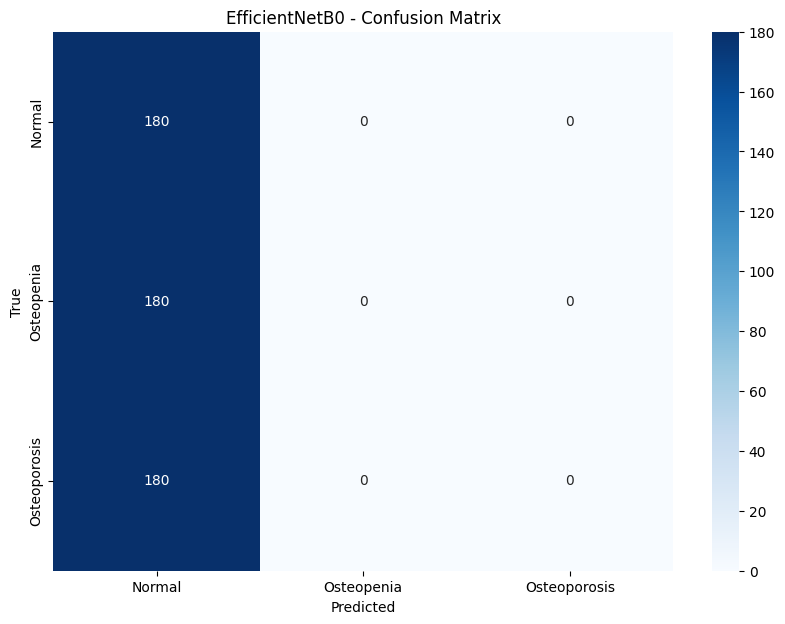

27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 67s 304ms/step - accuracy: 0.3399 - loss: 1.1372 - val_accuracy: 0.3333 - val_loss: 1.0993 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.3482 - loss: 1.1024 - val_accuracy: 0.3333 - val_loss: 1.0987 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.3301 - loss: 1.1028 - val_accuracy: 0.3333 - val_loss: 1.0985 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.3397 - loss: 1.0995 - val_accuracy: 0.3333 - val_loss: 1.0987 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.3295 - loss: 1.1001 - val_accuracy: 0.3333 - val_loss: 1.0988 - learning_rate: 1.0000e-04
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.3379 - loss: 1.1005 - val_accuracy: 0.3333 - val_loss: 1.0985 - learning_rate: 1.000

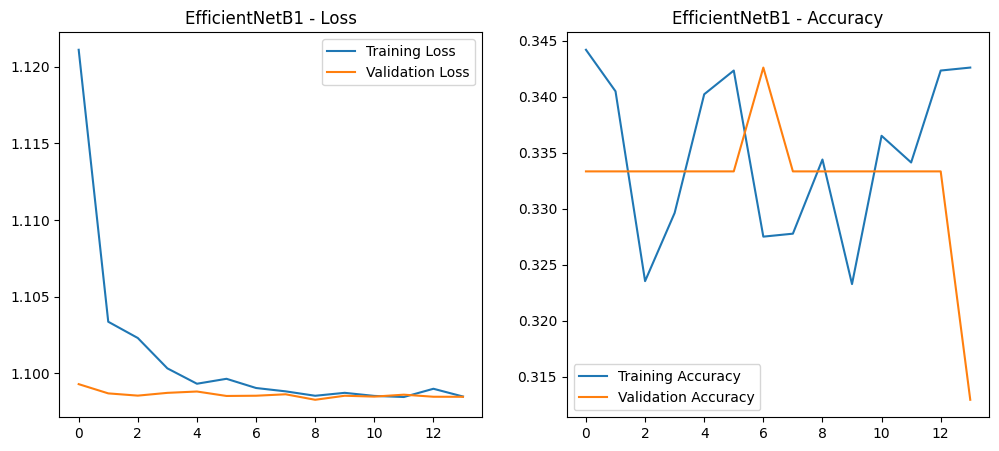

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - accuracy: 0.2530 - loss: 1.0981
EfficientNetB1 - Test Accuracy: 0.33, Test Loss: 1.10
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 575ms/step
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       180
  Osteopenia       0.33      1.00      0.50       180
Osteoporosis       0.00      0.00      0.00       180

    accuracy                           0.33       540
   macro avg       0.11      0.33      0.17       540
weighted avg       0.11      0.33      0.17       540



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


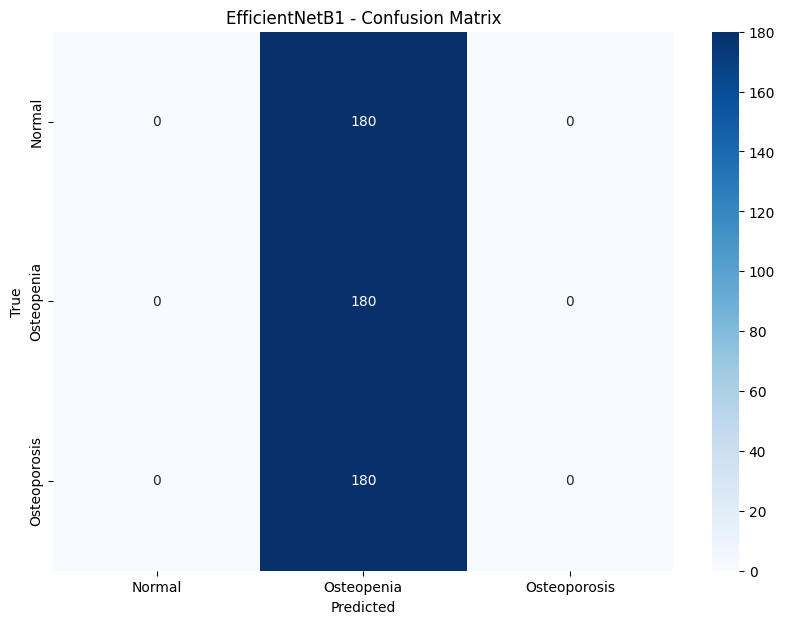

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 73s 331ms/step - accuracy: 0.3385 - loss: 1.1217 - val_accuracy: 0.3315 - val_loss: 1.0988 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.3452 - loss: 1.1001 - val_accuracy: 0.3333 - val_loss: 1.0988 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.3275 - loss: 1.1023 - val_accuracy: 0.3333 - val_loss: 1.0985 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.3464 - loss: 1.0991 - val_accuracy: 0.3333 - val_loss: 1.0987 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.3354 - loss: 1.0998 - val_accuracy: 0.3315 - val_loss: 1.0987 - learning_rate: 1.0000e-04
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.3277 - loss: 1.1010 - val_accuracy: 0.3333 - val_loss: 1.0985 - learning_rate: 1.000

In [ ]:
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


def build_model(base_model):
    base_model.trainable = False
    inputs = layers.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.6)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(3, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def train_and_evaluate(model, model_name):
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=100,
        callbacks=[early_stopping, reduce_lr]
    )

    model.save(f"/content/{model_name}_KneeOsteo_DeepModel.keras")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(f'{model_name} - Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f'{model_name} - Accuracy')
    plt.show()

    test_loss, test_acc = model.evaluate(test_generator)
    print(f'{model_name} - Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}')

    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

    print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


# -------------------- EfficientNetB0 --------------------
model_b0 = build_model(EfficientNetB0(weights='imagenet', include_top=False))
train_and_evaluate(model_b0, "EfficientNetB0")

# -------------------- EfficientNetB1 --------------------
model_b1 = build_model(EfficientNetB1(weights='imagenet', include_top=False))
train_and_evaluate(model_b1, "EfficientNetB1")

# -------------------- EfficientNetB2 --------------------
model_b2 = build_model(EfficientNetB2(weights='imagenet', include_top=False))
train_and_evaluate(model_b2, "EfficientNetB2")
